In [4]:
import numpy as np
import GPy
out_dim = 3
x = np.random.normal(size=(10, 2))
y = np.random.normal(size=(10, out_dim))
model = GPy.models.GPRegression(x, y)
xt = np.random.normal(size=(12, 2))
y_samp = model.posterior_samples_f(xt)
print("Output Dim: ", out_dim)
print("model.posterior_sample dimension: ", y_samp.shape)

out_dim=1
x = np.random.normal(size=(10, 2))
y = np.random.normal(size=(10, out_dim))
model = GPy.models.GPRegression(x, y)
xt = np.random.normal(size=(12, 2))
y_samp = model.posterior_samples_f(xt)
print("Output Dim: ", out_dim)
print("model.posterior_sample dimension: ", y_samp.shape)


Output Dim:  3
model.posterior_sample dimension:  (12, 3, 10)
Output Dim:  1
model.posterior_sample dimension:  (12, 1, 10)


In [2]:
xt.shape

(12, 2)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

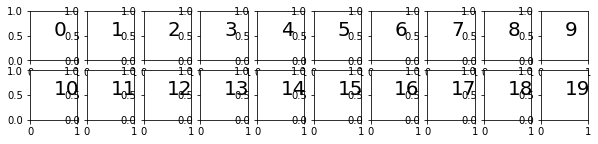

In [16]:
fig, ax_block = plt.subplots(nrows=2, ncols=10, figsize=(10, 2))
axs = ax_block.flatten()
for i, ax in enumerate(axs):
    ax.text(0.5, 0.5, str(i), fontsize=20)

In [9]:
0, 10, 11, 1, 2, 12, 13, 3, 4, 14, 15, 5, 6, 16, 17, 7, 8, 18, 19 9


In [ ]:
0, 0+cols, 0+1+cols, 0-10, 0

In [17]:
[0, 1,   2,  3,  4,  5,  6, 7, 8, 9]
[0, 10, 10,  0,  0, 10, 10, 0, 0]
[0, -1, -1, -2, -2, -3, -3, -4, -4, ]

[0, -1, -1, -2, -2, -3, -3, -4, -4]

In [18]:
import numpy as np

In [77]:
def order(depth, cols):
    """Returns the order of the axis to be visited in visualizing"""
    colmove= np.dot(np.hstack((np.ones((cols, 1)), np.zeros((cols, 1)))).flatten()[:, np.newaxis],
        np.array([[1, 1]])).flatten()[:depth-1] 
    rowmove = np.dot(np.asarray(range(1, cols+1))[:, np.newaxis], np.ones((1, 2))).flatten()[:depth-1]
    progress = np.array(range(1, depth))
    direction = [-1, cols]
    return np.hstack((0, progress + direction[0]*rowmove + direction[1]*colmove)), rowmove, colmove

In [81]:
depth=10
cols = int(np.ceil(depth/2))
ind, rowmove, colmove = order(depth, cols)

In [83]:
np.diff(colmove)

array([ 0., -1.,  0.,  1.,  0., -1.,  0.,  1.])

In [84]:
np.diff(rowmove)

array([ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.])

In [137]:
import teaching_plots as plot
y = np.exp(x) 



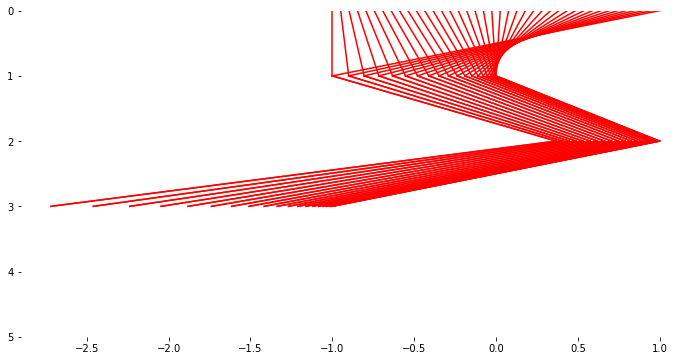

In [152]:
def pinball(x, y, layer=0, depth=1, ax=None, alpha=1.0):
    if ax is None:
        fig, ax = plt.subplots(figsize=plot.big_figsize)
    y = (1-alpha)*x + alpha*y
    for i in range(x.shape[0]):
        ax.plot((x[i], y[i]),(layer, layer+alpha), 'r-')
    #ax.set_ylim(ax.get_ylim()[::-1])
    ax.invert_yaxis()
    
    #ax.set_xlim((-1, 1))
    ax.set_ylim((depth, 0))
    
    ax.set_frame_on(False)

depth=5

x = np.linspace(-1, 1, 40)[:, np.newaxis]
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
pinball(x, -x**2, layer=0, depth=5, ax=ax, alpha=1.0)
pinball(-x**2, np.exp(-x**2), layer=1, depth=5, ax=ax, alpha=1.0)
pinball(np.exp(-x**2), -np.exp(x**2), layer=2, depth=5, ax=ax, alpha=1.0)#ax.plot(y, np.zeros(y.shape), 'r.')

In [121]:
bbox = ax.get_position()
bbox.x0 = 0
bbox.y0 = 0
bbox.y1 = 1
bbox.y0 = 1
ax.set_position(bbox)